(scipy)=

# SciPy : high-level scientific computing

**Authors**: _Gaël Varoquaux, Adrien Chauve, Andre Espaze, Emmanuelle Gouillart, Ralf Gommers_

:::{admonition} Scipy
The {mod}`scipy` package contains various toolboxes dedicated to common
issues in scientific computing. Its different submodules correspond
to different applications, such as interpolation, integration,
optimization, image processing, statistics, special functions, etc.
:::

::: {note}
:class: dropdown

{mod}`scipy` can be compared to other standard scientific-computing
libraries, such as the GSL (GNU Scientific Library for C and C++),
or Matlab's toolboxes. `scipy` is the core package for scientific
routines in Python; it is meant to operate efficiently on `numpy`
arrays, so that NumPy and SciPy work hand in hand.

Before implementing a routine, it is worth checking if the desired
data processing is not already implemented in SciPy. As
non-professional programmers, scientists often tend to **re-invent the
wheel**, which leads to buggy, non-optimal, difficult-to-share and
unmaintainable code. By contrast, `SciPy`'s routines are optimized
and tested, and should therefore be used when possible.
:::

:::{warning}
This tutorial is far from an introduction to numerical computing.
As enumerating the different submodules and functions in SciPy would
be very boring, we concentrate instead on a few examples to give a
general idea of how to use `scipy` for scientific computing.
:::

{mod}`scipy` is composed of task-specific sub-modules:

|                          |                                        |
| ------------------------ | -------------------------------------- |
| {mod}`scipy.cluster`     | Vector quantization / Kmeans           |
| {mod}`scipy.constants`   | Physical and mathematical constants    |
| {mod}`scipy.fft`         | Fourier transform                      |
| {mod}`scipy.integrate`   | Integration routines                   |
| {mod}`scipy.interpolate` | Interpolation                          |
| {mod}`scipy.io`          | Data input and output                  |
| {mod}`scipy.linalg`      | Linear algebra routines                |
| {mod}`scipy.ndimage`     | n-dimensional image package            |
| {mod}`scipy.odr`         | Orthogonal distance regression         |
| {mod}`scipy.optimize`    | Optimization                           |
| {mod}`scipy.signal`      | Signal processing                      |
| {mod}`scipy.sparse`      | Sparse matrices                        |
| {mod}`scipy.spatial`     | Spatial data structures and algorithms |
| {mod}`scipy.special`     | Any special mathematical functions     |
| {mod}`scipy.stats`       | Statistics                             |

Scipy modules all depend on {mod}`numpy`, but are mostly independent of each
other. The standard way of importing NumPy and these SciPy modules is:

In [1]:
import numpy as np
import scipy as sp

We will also be using plotting for this tutorial.

In [2]:
import matplotlib.pyplot as plt

## File input/output: {mod}`scipy.io`

{mod}`scipy.io` contains functions for loading and saving data in
several common formats including Matlab, IDL, Matrix Market, and
Harwell-Boeing.

**Matlab files**: Loading and saving:

In [3]:
a = np.ones((3, 3))
sp.io.savemat('file.mat', {'a': a})  # savemat expects a dictionary
data = sp.io.loadmat('file.mat')
data['a']

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

**Warning — Python / Matlab mismatch**

The Matlab file format does not support 1D arrays.

In [4]:
a = np.ones(3)
a

array([1., 1., 1.])

In [5]:
a.shape

(3,)

In [6]:
sp.io.savemat('file.mat', {'a': a})
a2 = sp.io.loadmat('file.mat')['a']
a2

array([[1., 1., 1.]])

In [7]:
a2.shape

(1, 3)

Notice that the original array was a one-dimensional array, whereas the
saved and reloaded array is a two-dimensional array with a single row.

For other formats, see the {mod}`scipy.io` documentation.

**End of warning**

:::{admonition} See also

- Load text files: {func}`numpy.loadtxt`/{func}`numpy.savetxt`
- Clever loading of text/csv files:
  {func}`numpy.genfromtxt`
- Fast and efficient, but NumPy-specific, binary format:
  {func}`numpy.save`/{func}`numpy.load`
- Basic input/output of images in Matplotlib:
  {func}`matplotlib.pyplot.imread`/{func}`matplotlib.pyplot.imsave`
- More advanced input/output of images: {mod}`imageio`
  :::

## Special functions: {mod}`scipy.special`

"Special" functions are functions commonly used in science and mathematics that
are not considered to be "elementary" functions. Examples include

- the gamma function, {func}`scipy.special.gamma`,
- the error function, {func}`scipy.special.erf`,
- Bessel functions, such as {func}`scipy.special.jv`
  (Bessel function of the first kind), and
- elliptic functions, such as {func}`scipy.special.ellipj`
  (Jacobi elliptic functions).

Other special functions are combinations of familiar elementary functions,
but they offer better accuracy or robustness than their naive implementations
would.

Most of these function are computed elementwise and follow standard
NumPy broadcasting rules when the input arrays have different shapes.
For example, {func}`scipy.special.xlog1py` is mathematically equivalent
to $x\log(1 + y)$.

In [8]:
x = np.asarray([1, 2])
y = np.asarray([[3], [4], [5]])
res = sp.special.xlog1py(x, y)
res.shape

(3, 2)

In [9]:
ref = x * np.log(1 + y)
np.allclose(res, ref)

True

However, {func}`scipy.special.xlog1py` is numerically favorable for small $y$,
when explicit addition of `1` would lead to loss of precision due to floating
point truncation error.

In [10]:
x = 2.5
y = 1e-18
x * np.log(1 + y)

np.float64(0.0)

In [11]:
sp.special.xlog1py(x, y)

np.float64(2.5e-18)

Many special functions also have "logarithmized" variants. For instance,
the gamma function $\Gamma(\cdot)$ is related to the factorial
function by $n! = \Gamma(n + 1)$, but it extends the domain from the
positive integers to the complex plane.

In [12]:
x = np.arange(10)
np.allclose(sp.special.gamma(x + 1), sp.special.factorial(x))

True

In [13]:
sp.special.gamma(5) < sp.special.gamma(5.5) < sp.special.gamma(6)

np.True_

The factorial function grows quickly, and so the gamma function overflows
for moderate values of the argument. However, sometimes only the logarithm
of the gamma function is needed. In such cases, we can compute the logarithm
of the gamma function directly using {func}`scipy.special.gammaln`.

In [14]:
x = [5, 50, 500]
np.log(sp.special.gamma(x))

array([  3.17805383, 144.56574395,          inf])

In [15]:
sp.special.gammaln(x)

array([   3.17805383,  144.56574395, 2605.11585036])

Such functions can often be used when the intermediate components of a
calculation would overflow or underflow, but the final result would not.
For example, suppose we wish to compute the ratio
$\Gamma(500)/\Gamma(499)$.

In [16]:
a = sp.special.gamma(500)
b = sp.special.gamma(499)
a, b

(np.float64(inf), np.float64(inf))

Both the numerator and denominator overflow, so performing $a / b$ will
not return the result we seek. However, the magnitude of the result should
be moderate, so the use of logarithms comes to mind. Combining the identities
$\log(a/b) = \log(a) - \log(b)$ and $\exp(\log(x)) = x$,
we get:

In [17]:
log_a = sp.special.gammaln(500)
log_b = sp.special.gammaln(499)
log_res = log_a - log_b
res = np.exp(log_res)
res

np.float64(499.00000000006696)

Similarly, suppose we wish to compute the difference
$\log(\Gamma(500) - \Gamma(499))$. For this, we use
{func}`scipy.special.logsumexp`, which computes
$\log(\exp(x) + \exp(y))$ using a numerical trick that avoids overflow.

In [18]:
res = sp.special.logsumexp([log_a, log_b],
                            b=[1, -1])  # weights the terms of the sum
res

np.float64(2605.1138443430073)

For more information about these and many other special functions, see
the documentation of {mod}`scipy.special`.

(scipy-linalg)=

## Linear algebra operations: {mod}`scipy.linalg`

{mod}`scipy.linalg` provides a Python interface to efficient, compiled
implementations of standard linear algebra operations: the BLAS (Basic
Linear Algebra Subroutines) and LAPACK (Linear Algebra PACKage) libraries.

For example, the {func}`scipy.linalg.det` function computes the determinant
of a square matrix:

In [19]:
arr = np.array([[1, 2],
                [3, 4]])
sp.linalg.det(arr)

np.float64(-2.0)

Mathematically, the solution of a linear system $Ax = b$ is $x = A^{-1}b$,
but explicit inversion of a matrix is numerically unstable and should be avoided.
Instead, use {func}`scipy.linalg.solve`:

In [20]:
A = np.array([[1, 2],
              [2, 3]])
b = np.array([14, 23])
x = sp.linalg.solve(A, b)
x

array([4., 5.])

In [21]:
np.allclose(A @ x, b)

True

Linear systems with special structure can often be solved more efficiently
than more general systems. For example, systems with triangular matrices
can be solved using {func}`scipy.linalg.solve_triangular`:

In [22]:
A_upper = np.triu(A)
A_upper

array([[1, 2],
       [0, 3]])

In [23]:
np.allclose(sp.linalg.solve_triangular(A_upper, b, lower=False),
            sp.linalg.solve(A_upper, b))

True

{mod}`scipy.linalg` also features matrix factorizations/decompositions
such as the singular value decomposition.

In [24]:
A = np.array([[1, 2],
              [2, 3]])
U, s, Vh = sp.linalg.svd(A)
s  # singular values

array([4.23606798, 0.23606798])

The original matrix can be recovered by matrix multiplication of the
factors:

In [25]:
S = np.diag(s)  # convert to diagonal matrix before matrix multiplication
A2 = U @ S @ Vh
np.allclose(A2, A)

True

In [26]:
A3 = (U * s) @ Vh  # more efficient: use array math broadcasting rules!
np.allclose(A3, A)

True

Many other decompositions (e.g. LU, Cholesky, QR), solvers for structured
linear systems (e.g. triangular, circulant), eigenvalue problem algorithms,
matrix functions (e.g. matrix exponential), and routines for special matrix
creation (e.g. block diagonal, toeplitz) are available in {mod}`scipy.linalg`.

(intro-scipy-interpolate)=

## Interpolation: {mod}`scipy.interpolate`

{mod}`scipy.interpolate` is used for fitting a function -- an "interpolant" --
to experimental or computed data. Once fit, the interpolant can be used to
approximate the underlying function at intermediate points; it can also be used
to compute the integral, derivative, or inverse of the function.

Some kinds of interpolants, known as "smoothing splines", are designed to
generate smooth curves from noisy data. For example, suppose we have
the following data:

In [27]:
rng = np.random.default_rng(27446968)

measured_time = np.linspace(0, 2 * np.pi, 20)
function = np.sin(measured_time)
noise = rng.normal(loc=0, scale=0.1, size=20)
measurements = function + noise

{func}`scipy.interpolate.make_smoothing_spline` can be used to form a curve
similar to the underlying sine function.

In [28]:
smoothing_spline = sp.interpolate.make_smoothing_spline(measured_time, measurements)
interpolation_time = np.linspace(0, 2 * np.pi, 200)
smooth_results = smoothing_spline(interpolation_time)

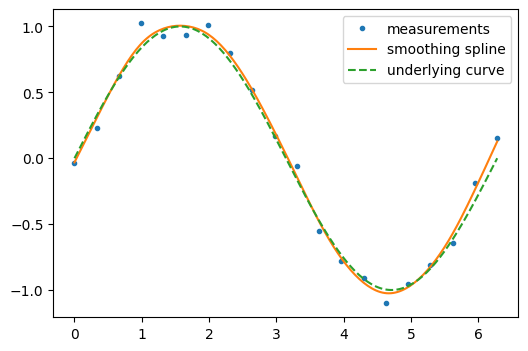

In [29]:
plt.figure(figsize=(6, 4))
plt.plot(measured_time, measurements, ".", ms=6, label="measurements")
plt.plot(interpolation_time, smooth_results, label="smoothing spline")
plt.plot(interpolation_time, np.sin(interpolation_time), "--", label="underlying curve")
plt.legend();

On the other hand, if the data are not noisy, it may be desirable to pass
exactly through each point.

In [30]:
interp_spline = sp.interpolate.make_interp_spline(measured_time, function)
interp_results = interp_spline(interpolation_time)

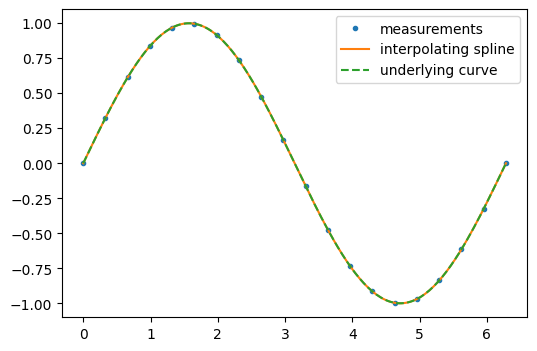

In [31]:
# Plot the data, the interpolant, and the original function
plt.figure(figsize=(6, 4))
plt.plot(measured_time, function, ".", ms=6, label="measurements")
plt.plot(interpolation_time, interp_results, label="interpolating spline")
plt.plot(interpolation_time, np.sin(interpolation_time), "--", label="underlying curve")
plt.legend();

The `derivative` and `antiderivative` methods of the result object can be used
for differentiation and integration. For the latter, the constant of integration is
assumed to be zero, but we can "wrap" the antiderivative to include a nonzero
constant of integration.

In [32]:
d_interp_spline = interp_spline.derivative()
d_interp_results = d_interp_spline(interpolation_time)
i_interp_spline = lambda t: interp_spline.antiderivative()(t) - 1
i_interp_results = i_interp_spline(interpolation_time)

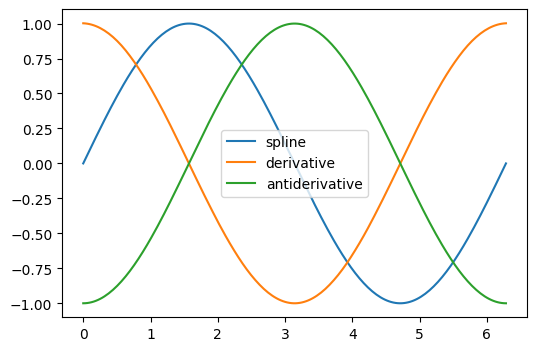

In [33]:
# Plot interpolant, its derivative, and its antiderivative
plt.figure(figsize=(6, 4))
t = interpolation_time
plt.plot(t, interp_results, label="spline")
plt.plot(t, d_interp_results, label="derivative")
plt.plot(t, i_interp_results, label="antiderivative")
plt.legend();

For functions that are monotonic on an interval (e.g. $\sin$ from $\pi/2$
to $3\pi/2$), we can reverse the arguments of `make_interp_spline` to
interpolate the inverse function. Because the first argument is expected to be
monotonically _increasing_, we also reverse the order of elements in the arrays
with {func}`numpy.flip`.

In [34]:
i = (measured_time > np.pi/2) & (measured_time < 3*np.pi/2)
inverse_spline = sp.interpolate.make_interp_spline(np.flip(function[i]),
                                                   np.flip(measured_time[i]))
inverse_spline(0)

array(3.14159265)

See the summary exercise on {ref}`summary-exercise-stat-interp` for a more
advanced spline interpolation example, and read the [SciPy interpolation
tutorial](https://scipy.github.io/devdocs/tutorial/interpolate.html) and the
{mod}`scipy.interpolate` documentation for much more information.

## Optimization and fit: {mod}`scipy.optimize`

{mod}`scipy.optimize` provides algorithms for root finding, curve fitting,
and more general optimization.

### Root Finding

{func}`scipy.optimize.root_scalar` attempts to find a root of a specified
scalar-valued function (i.e., an argument at which the function value is zero).
Like many {mod}`scipy.optimize` functions, the function needs an initial
guess of the solution, which the algorithm will refine until it converges or
recognizes failure. We also provide the derivative to improve the rate of
convergence.

In [35]:
def f(x):
    return (x-1)*(x-2)

def df(x):
    return 2*x - 3

x0 = 0  # guess
res = sp.optimize.root_scalar(f, x0=x0, fprime=df)
res

      converged: True
           flag: converged
 function_calls: 12
     iterations: 6
           root: 1.0
         method: newton

:::{warning}

None of the functions in {mod}`scipy.optimize` that accept a guess are
guaranteed to converge for all possible guesses! (For example, try
`x0=1.5` in the example above, where the derivative of the function is
exactly zero.) If this occurs, try a different guess, adjust the options
(like providing a `bracket` as shown below), or consider whether SciPy
offers a more appropriate method for the problem.

:::

Note that only one the root at `1.0` is found. By inspection, we can tell
that there is a second root at `2.0`. We can direct the function toward a
particular root by changing the guess or by passing a bracket that contains
only the root we seek.

In [36]:
res = sp.optimize.root_scalar(f, bracket=(1.5, 10))
res.root

2.0

For multivariate problems, use {func}`scipy.optimize.root`.

In [37]:
def f(x):
    # intersection of unit circle and line from origin
    return [x[0]**2 + x[1]**2 - 1,
            x[1] - x[0]]

res = sp.optimize.root(f, x0=[0, 0])
np.allclose(f(res.x), 0, atol=1e-10)

True

In [38]:
np.allclose(res.x, np.sqrt(2)/2)

True

Over-constrained problems can be solved in the least-squares sense using
{func}`scipy.optimize.root` with `method='lm'` (Levenberg-Marquardt).

In [39]:
def f(x):
    # intersection of unit circle, line from origin, and parabola
    return [x[0]**2 + x[1]**2 - 1,
            x[1] - x[0],
            x[1] - x[0]**2]

res = sp.optimize.root(f, x0=[1, 1], method='lm')
res.success

True

In [40]:
res.x

array([0.76096066, 0.66017736])

See the documentation of {func}`scipy.optimize.root_scalar` and
{func}`scipy.optimize.root` for a variety of other solution algorithms and
options.

### Curve fitting

Suppose we have data that is sinusoidal but noisy:

In [41]:
x_data = np.linspace(-5, 5, num=50)  # 50 values between -5 and 5
noise = 0.01 * np.cos(100 * x_data)
a, b = 2.9, 1.5
y_data = a * np.cos(b * x_data) + noise

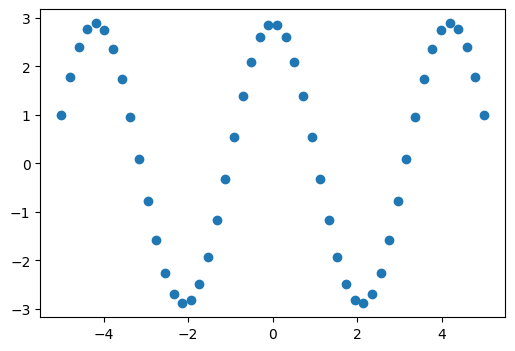

In [42]:
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data);

We can approximate the underlying amplitude, frequency, and phase
from the data by least squares curve fitting. To begin, we write
a function that accepts the independent variable as the first
argument and all parameters to fit as separate arguments:

In [43]:
def f(x, a, b, c):
    return a * np.sin(b * x + c)

We then use {func}`scipy.optimize.curve_fit` to find $a$ and $b$:

In [44]:
params, _ = sp.optimize.curve_fit(f, x_data, y_data, p0=[2, 1, 3])
params

array([2.900026  , 1.50012043, 1.57079633])

In [45]:
ref = [a, b, np.pi/2]  # what we'd expect
np.allclose(params, ref, rtol=1e-3)

True

We plot the resulting curve on the data:

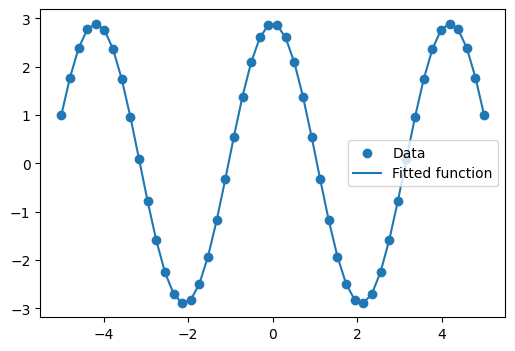

In [46]:
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label="Data")
plt.plot(x_data, f(x_data, *params), label="Fitted function")
plt.legend(loc="best");

::: {exercise-start}
:label: scipy-curve-fit-ex
:class: dropdown
:::

The temperature extremes in Alaska for each month, starting in January, are
given by (in degrees Celsius):

```text
max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18
min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58
```

1. Plot these temperature extremes.
2. Define a function that can describe min and max temperatures.
   Hint: this function has to have a period of 1 year.
   Hint: include a time offset.
3. Fit this function to the data with {func}`scipy.optimize.curve_fit`.
4. Plot the result. Is the fit reasonable? If not, why?
5. Is the time offset for min and max temperatures the same within the fit
   accuracy?

::: {exercise-end}
:::

::: {solution-start} scipy-curve-fit-ex
:class: dropdown
:::

Curve fitting: temperature as a function of month of the year

We have the min and max temperatures in Alaska for each months of the
year. We would like to find a function to describe this yearly evolution.

For this, we will fit a periodic function.

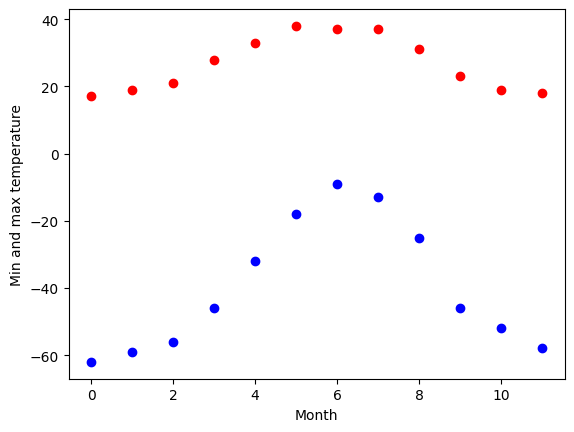

In [47]:
# The data
temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

months = np.arange(12)
plt.plot(months, temp_max, "ro")
plt.plot(months, temp_min, "bo")
plt.xlabel("Month")
plt.ylabel("Min and max temperature");

Fitting it to a periodic function:

In [48]:
def yearly_temps(times, avg, ampl, time_offset):
    return avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max())

res_max, cov_max = sp.optimize.curve_fit(yearly_temps, months, temp_max, [20, 10, 0])
res_min, cov_min = sp.optimize.curve_fit(yearly_temps, months, temp_min, [-40, 20, 0])

Plotting the fit

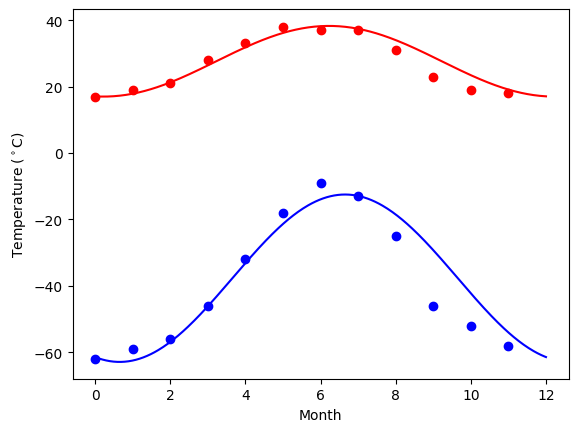

In [49]:
days = np.linspace(0, 12, num=365)
plt.figure()
plt.plot(months, temp_max, "ro")
plt.plot(days, yearly_temps(days, *res_max), "r-")
plt.plot(months, temp_min, "bo")
plt.plot(days, yearly_temps(days, *res_min), "b-")
plt.xlabel("Month")
plt.ylabel(r"Temperature ($^\circ$C)");

::: {solution-end}
:::

### Optimization

Suppose we wish to minimize the scalar-valued function of a single
variable $f(x) = x^2  + 10 \sin(x)$:

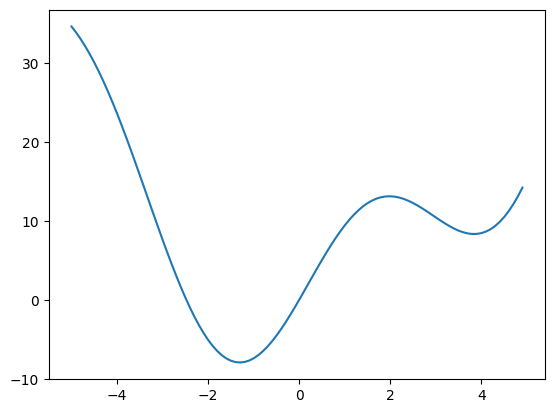

In [50]:
def f(x):
    return x**2 + 10 * np.sin(x)

x = np.arange(-5, 5, 0.1)
plt.plot(x, f(x))

We can see that the function has a local minimizer near $x = 3.8$ and a global
minimizer near $x = -1.3$, but the precise values cannot be determined from the
plot.

The most appropriate function for this purpose is
{func}`scipy.optimize.minimize_scalar`.
Since we know the approximate locations of the minima, we will provide
bounds that restrict the search to the vicinity of the global minimum.

In [51]:
res = sp.optimize.minimize_scalar(f, bounds=(-2, -1))
res

 message: Solution found.
 success: True
  status: 0
     fun: -7.9458233756095895
       x: -1.3064409970312618
     nit: 8
    nfev: 8

In [52]:
res.fun == f(res.x)

np.True_

If we did not already know the approximate location of the global minimum,
we could use one of SciPy's global minimizers, such as
{func}`scipy.optimize.differential_evolution`. We are required to pass
`bounds`, but they do not need to be tight.

In [53]:
bounds=[(-5, 5)]  # list of lower, upper bound for each variable
res = sp.optimize.differential_evolution(f, bounds=bounds)
res

             message: Optimization terminated successfully.
             success: True
                 fun: -7.945823375615284
                   x: [-1.306e+00]
                 nit: 8
                nfev: 143
          population: [[-1.303e+00]
                       [-1.405e+00]
                       ...
                       [-1.292e+00]
                       [-1.333e+00]]
 population_energies: [-7.946e+00 -7.888e+00 ... -7.945e+00 -7.942e+00]
                 jac: [ 8.882e-08]

For multivariate optimization, a good choice for many problems is
{func}`scipy.optimize.minimize`.
Suppose we wish to find the minimum of a quadratic function of two
variables, $f(x_0, x_1) = (x_0-1)^2 + (x_1-2)^2$.

In [54]:
def f(x):
    return (x[0] - 1)**2 + (x[1] - 2)**2

Like {func}`scipy.optimize.root`, {func}`scipy.optimize.minimize`
requires a guess `x0`. (Note that this is the initial value of
_both_ variables rather than the value of the variable we happened to
label $x_0$.)

In [55]:
res = sp.optimize.minimize(f, x0=[0, 0])
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.705780445775116e-16
        x: [ 1.000e+00  2.000e+00]
      nit: 2
      jac: [ 3.219e-09 -8.462e-09]
 hess_inv: [[ 9.000e-01 -2.000e-01]
            [-2.000e-01  6.000e-01]]
     nfev: 9
     njev: 3

:::{sidebar} Maximization?
Is {func}`scipy.optimize.minimize` restricted to the solution of
minimization problems? Nope! To solve a maximization problem,
simply minimize the _negative_ of the original objective function.
:::

This barely scratches the surface of SciPy's optimization features, which
include mixed integer linear programming, constrained nonlinear programming,
and the solution of assignment problems. For much more information, see the
documentation of {mod}`scipy.optimize` and the advanced chapter
{ref}`mathematical-optimization`.

::: {exercise-start}
:label: scipy-2d-minimization-ex
:class: dropdown
:::

This is an exercise on 2-D minimization.

The six-hump camelback function

$f(x, y) = (4 - 2.1x^2 + \frac{x^4}{3})x^2 + xy + (4y^2 - 4)y^2$

has multiple local minima. Find a global minimum (there is more than one,
each with the same value of the objective function) and at least one other
local minimum.

Hints:

- Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
- {func}`numpy.meshgrid` and {func}`matplotlib.pyplot.imshow` can help
  with visualization.
- Try minimizing with {func}`scipy.optimize.minimize` with an initial
  guess of $(x, y) = (0, 0)$. Does it find the global minimum, or
  converge to a local minimum? What about other initial guesses?
- Try minimizing with {func}`scipy.optimize.differential_evolution`.

::: {exercise-end}
:::

::: {solution-start} scipy-2d-minimization-ex
:class: dropdown
:::

Optimization of a two-parameter function:

In [56]:
# Define the function that we are interested in
def sixhump(x):
    return (
        (4 - 2.1 * x[0] ** 2 + x[0] ** 4 / 3) * x[0] ** 2
        + x[0] * x[1]
        + (-4 + 4 * x[1] ** 2) * x[1] ** 2
    )

# Make a grid to evaluate the function (for plotting)
xlim = [-2, 2]
ylim = [-1, 1]
x = np.linspace(*xlim)  # type: ignore[call-overload]
y = np.linspace(*ylim)  # type: ignore[call-overload]
xg, yg = np.meshgrid(x, y)

A 2D image plot of the function:

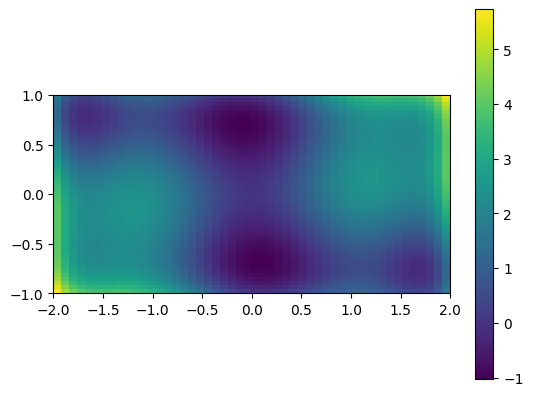

In [57]:
# Simple visualization in 2D
plt.figure()
plt.imshow(sixhump([xg, yg]), extent=xlim + ylim, origin="lower")  # type: ignore[arg-type]
plt.colorbar();

A 3D surface plot of the function:

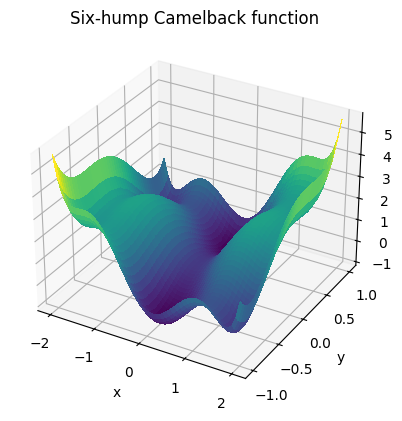

In [58]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax: Axes3D = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(
    xg,
    yg,
    sixhump([xg, yg]),
    rstride=1,
    cstride=1,
    cmap="viridis",
    linewidth=0,
    antialiased=False,
)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.set_title("Six-hump Camelback function");

Find minima:

In [59]:
# local minimization
res_local = sp.optimize.minimize(sixhump, x0=[0, 0])
# global minimization
res_global = sp.optimize.differential_evolution(sixhump, bounds=[xlim, ylim])

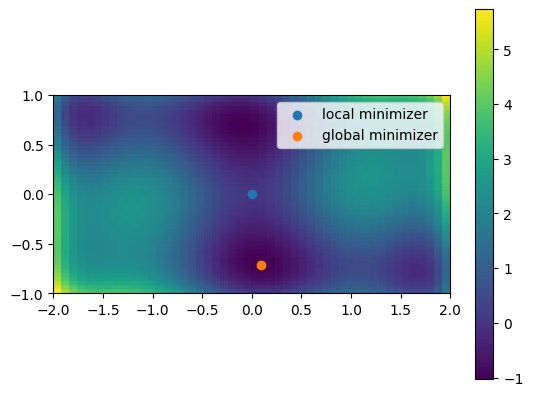

In [60]:
plt.figure()
# Show the function in 2D
plt.imshow(sixhump([xg, yg]), extent=xlim + ylim, origin="lower")  # type: ignore[arg-type]
plt.colorbar()
# Mark the minima
plt.scatter(res_local.x[0], res_local.x[1], label="local minimizer")
plt.scatter(res_global.x[0], res_global.x[1], label="global minimizer")
plt.legend();

::: {solution-end}
:::

See the summary exercise on {ref}`summary-exercise-optimize` for another, more
advanced example.

## Statistics and random numbers: {mod}`scipy.stats`

{mod}`scipy.stats` contains fundamental tools for statistics in Python.

### Statistical Distributions

Consider a random variable distributed according to the standard normal.
We draw a sample consisting of 100000 observations from the random variable.
The normalized histogram of the sample is an estimator of the random
variable's probability density function (PDF):

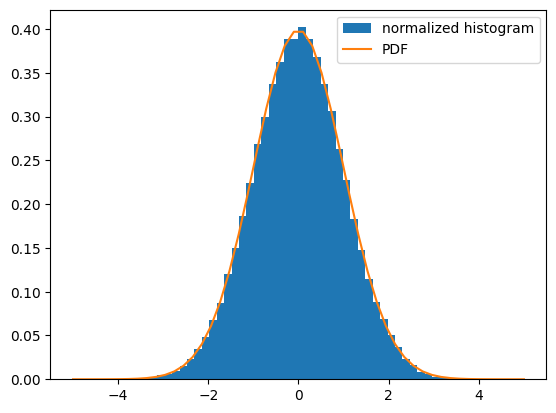

In [61]:
dist = sp.stats.norm(loc=0, scale=1)  # standard normal distribution
sample = dist.rvs(size=100000)  # "random variate sample"
plt.hist(sample, bins=50, density=True, label='normalized histogram')
x = np.linspace(-5, 5)
plt.plot(x, dist.pdf(x), label='PDF')
plt.legend()

:::{sidebar} Distribution objects and frozen distributions

Each of the 100+ {mod}`scipy.stats` distribution families is represented by an
_object_ with a `__call__` method. Here, we call the {class}`scipy.stats.norm`
object to specify its location and scale, and it returns a _frozen_
distribution: a particular element of a distribution family with all
parameters fixed. The frozen distribution object has methods to compute
essential functions of the particular distribution.

:::

Suppose we knew that the sample had been drawn from a distribution belonging to
the family of normal distributions, but we did not know the particular
distribution's location (mean) and scale (standard deviation). We perform
maximum likelihood estimation of the unknown parameters using the distribution
family's `fit` method:

In [62]:
loc, scale = sp.stats.norm.fit(sample)
loc

np.float64(-0.000891305081054762)

In [63]:
scale

np.float64(0.9999359333595378)

Since we know the true parameters of the distribution from which the
sample was drawn, we are not surprised that these estimates are similar.

::: {exercise-start}
:label: scipy-prob-dist-ex
:class: dropdown
:::

Generate 1000 random variates from a gamma distribution with a shape
parameter of 1. _Hint: the shape parameter is passed as the first
argument when freezing the distribution_. Plot the histogram of the
sample, and overlay the distribution's PDF. Estimate the shape parameter
from the sample using the `fit` method.

Extra: the distributions have many useful methods. Explore them
using tab completion. Plot the cumulative density function of the
distribution, and compute the variance.

::: {exercise-end}
:::

### Sample Statistics and Hypothesis Tests

The sample mean is an estimator of the mean of the distribution from which
the sample was drawn:

In [64]:
np.mean(sample)

np.float64(-0.000891305081054762)

NumPy includes some of the most fundamental sample statistics (e.g.
{func}`numpy.mean`, {func}`numpy.var`, {func}`numpy.percentile`);
{mod}`scipy.stats` includes many more. For instance, the geometric mean
is a common measure of central tendency for data that tends to be
distributed over many orders of magnitude.

In [65]:
sp.stats.gmean(2**sample)

np.float64(0.9993823851986353)

SciPy also includes a variety of hypothesis tests that produce a
sample statistic and a p-value. For instance, suppose we wish to
test the null hypothesis that `sample` was drawn from a normal
distribution:

In [66]:
res = sp.stats.normaltest(sample)
res.statistic

np.float64(0.7492857304801424)

In [67]:
res.pvalue

np.float64(0.68753477751801)

Here, `statistic` is a sample statistic that tends to be high for
samples that are drawn from non-normal distributions. `pvalue` is
the probability of observing such a high value of the statistic for
a sample that _has_ been drawn from a normal distribution. If the
p-value is unusually small, this may be taken as evidence that
`sample` was _not_ drawn from the normal distribution. Our statistic
and p-value are moderate, so the test is inconclusive.

There are many other features of {mod}`scipy.stats`, including circular
statistics, quasi-Monte Carlo methods, and resampling methods.
For much more information, see the documentation of {mod}`scipy.stats`
and the advanced chapter {ref}`statistics <statistics>`.

## Numerical integration: {mod}`scipy.integrate`

### Quadrature

Suppose we wish to compute the definite integral
$\int_0^{\pi / 2} \sin(t) dt$ numerically. {func}`scipy.integrate.quad`
chooses one of several adaptive techniques depending on the parameters, and
is therefore the recommended first choice for integration of function of a single variable:

In [68]:
integral, error_estimate = sp.integrate.quad(np.sin, 0, np.pi / 2)
np.allclose(integral, 1)  # numerical result ~ analytical result

True

In [69]:
abs(integral - 1) < error_estimate  #  actual error < estimated error

True

Other functions for _numerical quadrature_, including integration of
multivariate functions and approximating integrals from samples, are available
in {mod}`scipy.integrate`.

### Initial Value Problems

{mod}`scipy.integrate` also features routines for integrating [Ordinary
Differential Equations
(ODE)](https://en.wikipedia.org/wiki/Ordinary_differential_equation). For
example, {func}`scipy.integrate.solve_ivp` integrates ODEs of the form:

$$
\frac{dy}{dt} = f(t, y(t))
$$

from an initial time $t_0$ and initial state $y(t=t_0)=t_0$ to a final
time $t_f$ or until an event occurs (e.g. a specified state is reached).

As an introduction, consider the initial value problem given by
$\frac{dy}{dt} = -2 y$ and the initial condition $y(t=0) = 1$ on
the interval $t = 0 \dots 4$. We begin by defining a callable that
computes $f(t, y(t))$ given the current time and state.

In [70]:
def f(t, y):
    return -2 * y

Then, to compute `y` as a function of time:

In [71]:
t_span = (0, 4)  # time interval
t_eval = np.linspace(*t_span)  # times at which to evaluate `y`
y0 = [1,]  # initial state
res = sp.integrate.solve_ivp(f, t_span=t_span, y0=y0, t_eval=t_eval)

and plot the result:

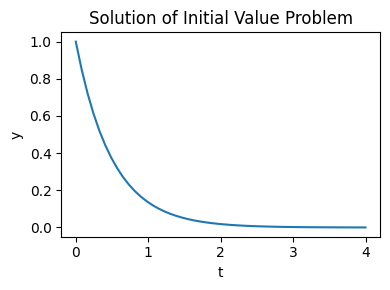

In [72]:
plt.figure(figsize=(4, 3))
plt.plot(res.t, res.y[0])
plt.xlabel('t')
plt.ylabel('y')
plt.title('Solution of Initial Value Problem')
plt.tight_layout();

Let us integrate a more complex ODE: a [damped
spring-mass oscillator](https://en.wikipedia.org/wiki/Harmonic_oscillator#Damped_harmonic_oscillator).
The position of a mass attached to a spring obeys the 2nd order ODE
$\ddot{y} + 2 \zeta \omega_0  \dot{y} + \omega_0^2 y = 0$ with natural frequency
$\omega_0 = \sqrt{k/m}$, damping ratio $\zeta = c/(2 m \omega_0)$,
spring constant $k$, mass $m$, and damping coefficient $c$.

Before using {func}`scipy.integrate.solve_ivp`, the 2nd order ODE needs to be
transformed into a system of first-order ODEs. Note that

$$
\frac{dy}{dt} = \dot{y}
\frac{d\dot{y}}{dt} = \ddot{y} = -(2 \zeta \omega_0  \dot{y} + \omega_0^2 y)
$$

If we define $z = [z_0, z_1]$ where $z_0 = y$ and $z_1 = \dot{y}$, then the
first order equation:

$$
\frac{dz}{dt} =
\begin{bmatrix}
    \frac{dz_0}{dt} \\
    \frac{dz_1}{dt}
\end{bmatrix} =
\begin{bmatrix}
    z_1  \\
    -(2 \zeta \omega_0  z_1 + \omega_0^2 z_0)
\end{bmatrix}
$$

is equivalent to the original second order equation.

We set:

In [73]:
m = 0.5  # kg
k = 4  # N/m
c = 0.4  # N s/m
zeta = c / (2 * m * np.sqrt(k/m))
omega = np.sqrt(k / m)

and define the function that computes $\dot{z} = f(t, z(t))$:

In [74]:
def f(t, z, zeta, omega):
    return (z[1], -2.0 * zeta * omega * z[1] - omega**2 * z[0])

Integration of the system follows:

In [75]:
t_span = (0, 10)
t_eval = np.linspace(*t_span, 100)
z0 = [1, 0]
res = sp.integrate.solve_ivp(f, t_span, z0, t_eval=t_eval,
                             args=(zeta, omega), method='LSODA')

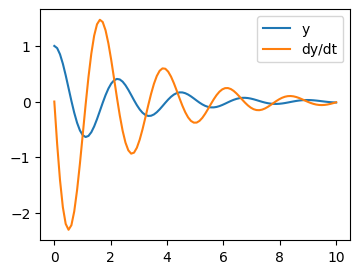

In [76]:
plt.figure(figsize=(4, 3))
plt.plot(res.t, res.y[0], label="y")
plt.plot(res.t, res.y[1], label="dy/dt")
plt.legend(loc="best");

::: {note}
:class: dropdown

With the option `method='LSODA'`, {func}`scipy.integrate.solve_ivp` uses the LSODA
(Livermore Solver for Ordinary Differential equations with Automatic method switching
for stiff and non-stiff problems). See the [ODEPACK Fortran library] for more details.
:::

:::{admonition} See also

**Partial Differental Equations**

There is no Partial Differential Equations (PDE) solver in SciPy.
Some Python packages for solving PDE's are available, such as [fipy]
or [SfePy].
:::

## Fast Fourier transforms: {mod}`scipy.fft`

The {mod}`scipy.fft` module computes fast Fourier transforms (FFTs)
and offers utilities to handle them. Some important functions are:

- {func}`scipy.fft.fft` to compute the FFT
- {func}`scipy.fft.fftfreq` to generate the sampling frequencies
- {func}`scipy.fft.ifft` to compute the inverse FFT, from frequency
  space to signal space

As an illustration, a example (noisy) input signal (`sig`), and its FFT:

In [77]:
# Time.
dt = 0.02  # Time step.
t = np.arange(0, 20, dt)  # Time vector.
# An example noisy signal over time.
sig = np.sin(2 * np.pi / 5.0 * t) + 0.5 * rng.normal(size=t.size)
# FFT of signal.
sig_fft = sp.fft.fft(sig)
# Corresponding frequencies.
freqs = sp.fft.fftfreq(sig.size, d=dt)

::: {list-table}

- - Signal
  - FFT
- - ::: {glue} original_signal_fig
    :doc: scipy_examples.md
    :::
  - ::: {glue} fft_of_signal_fig
    :doc: scipy_examples.md
    :::

:::

The peak signal frequency can be found with `freqs[power.argmax()]`.

The code of this example and the figures above can be found in the [Scipy FFT
example](scipy-fft-example).

Setting the Fourier component above this frequency to zero and inverting the
FFT with {func}`scipy.fft.ifft`, gives a filtered signal (see the
[example](scipy-fft-example) for detail).

::: {glue} fft_filter_fig
:doc: scipy_examples.md
:::

:::{admonition} `numpy.fft`

NumPy also has an implementation of FFT ({mod}`numpy.fft`). However, the SciPy
one should be preferred, as it uses more efficient underlying implementations.

:::

**Fully worked examples:**

::: {list-table}

- - [Crude periodicity finding](eg-periodicity-finder)
  - [Image blur with FFT](eg-image-blur)
- - ::: {glue} periodicity_fig
    :doc: scipy_examples.md
    :::
  - ::: {glue} blur_fig
    :doc: scipy_examples.md
    :::

:::

::: {exercise-start}
:label: scipy-image-denoise-ex
:class: dropdown
:::

![](data/moonlanding.png)

1. Examine the provided image {download}`moonlanding.png
<data/moonlanding.png>`, which is heavily contaminated with periodic
   noise. In this exercise, we aim to clean up the noise using the
   Fast Fourier Transform.
2. Load the image using {func}`matplotlib.pyplot.imread`.
3. Find and use the 2-D FFT function in {mod}`scipy.fft`, and plot the
   spectrum (Fourier transform of) the image. Do you have any trouble
   visualising the spectrum? If so, why?
4. The spectrum consists of high and low frequency components. The noise is
   contained in the high-frequency part of the spectrum, so set some of
   those components to zero (use array slicing).
5. Apply the inverse Fourier transform to see the resulting image.

::: {exercise-end}
:::

::: {solution-start} scipy-image-denoise-ex
:class: dropdown
:::

Implementing image denoising with FFT.

Denoise an image ({download}`data/moonlanding.png`) by implementing a blur
with an FFT.

Implements, via FFT, the following convolution:

$$
\begin{align}
f_1(t) = \int dt'\, K(t-t') f_0(t') \\
\tilde{f}_1(\omega) = \tilde{K}(\omega) \tilde{f}_0(\omega)
\end{align}
$$

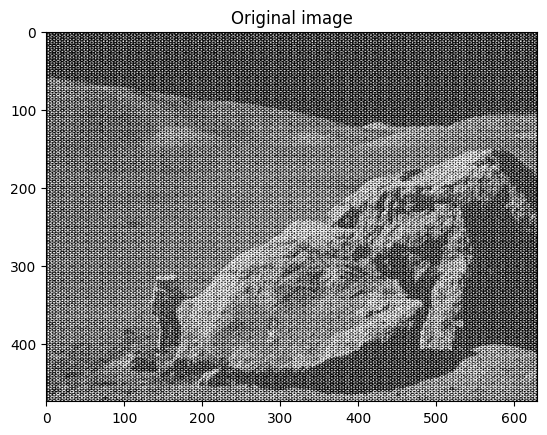

In [78]:
# Read and plot the image
im = plt.imread("data/moonlanding.png").astype(float)

plt.figure()
plt.imshow(im, "gray")
plt.title("Original image");

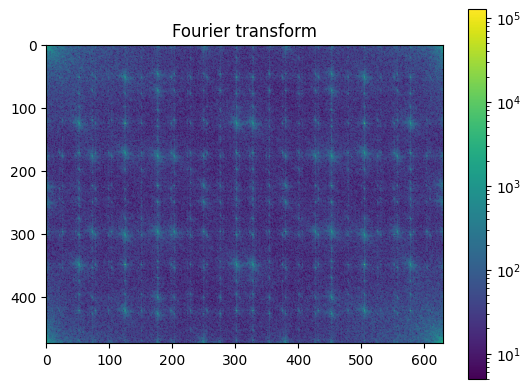

In [79]:
# Compute the 2d FFT of the input image
im_fft = sp.fft.fft2(im)

# Show the results
from matplotlib.colors import LogNorm

def plot_spectrum(im_fft):
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure()
plot_spectrum(im_fft)
plt.title("Fourier transform");

Filter in FFT:

In the lines following, we'll make a copy of the original spectrum and
truncate coefficients.

In [80]:
# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.1

# Call ff a copy of the original transform. NumPy arrays have a copy
# method for this purpose.
im_fft2 = im_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2[int(r * keep_fraction) : int(r * (1 - keep_fraction))] = 0

# Similarly with the columns:
im_fft2[:, int(c * keep_fraction) : int(c * (1 - keep_fraction))] = 0

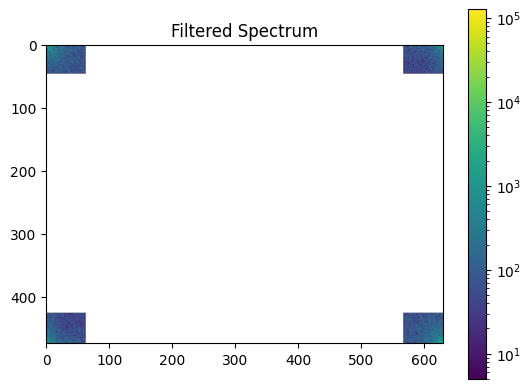

In [81]:
plt.figure()
plot_spectrum(im_fft2)
plt.title("Filtered Spectrum");

Reconstruct the final image

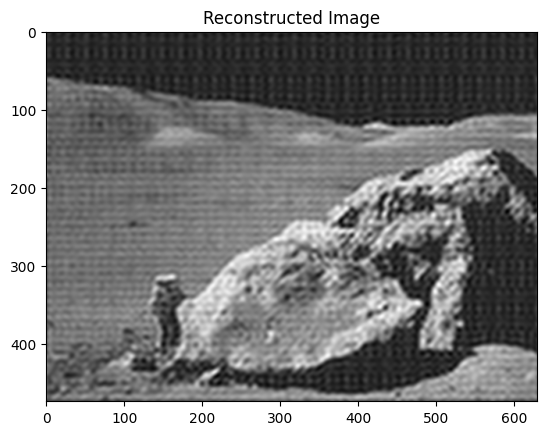

In [82]:
# Reconstruct the denoised image from the filtered spectrum, keep only the
# real part for display.
im_new = sp.fft.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, "gray")
plt.title("Reconstructed Image");

Easier and better: {func}`scipy.ndimage.gaussian_filter`

Implementing filtering directly with FFTs is tricky and time consuming.
We can use the Gaussian filter from {mod}`scipy.ndimage`

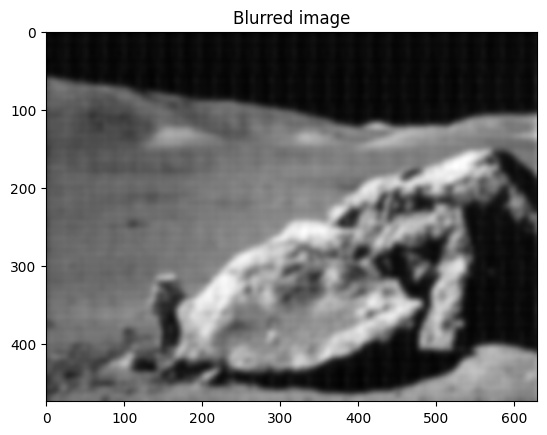

In [83]:
im_blur = sp.ndimage.gaussian_filter(im, 4)

plt.figure()
plt.imshow(im_blur, "gray")
plt.title("Blurred image");

::: {solution-end}
:::

## Signal processing: {mod}`scipy.signal`

::: {note}
:class: dropdown

{mod}`scipy.signal` is for typical signal processing: 1D,
regularly-sampled signals.
:::

**Resampling** {func}`scipy.signal.resample`: resample a signal to `n`
points using FFT.

In [84]:
t = np.linspace(0, 5, 100)
x = np.sin(t)

x_resampled = sp.signal.resample(x, 25)

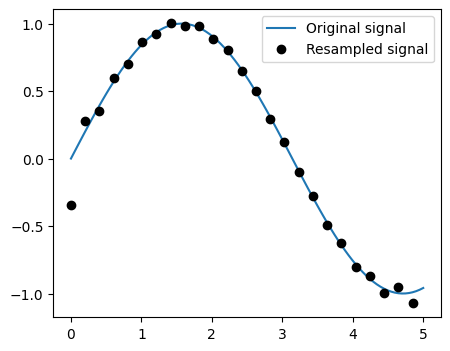

In [85]:
# Plot
plt.figure(figsize=(5, 4))
plt.plot(t, x, label="Original signal")
plt.plot(t[::4], x_resampled, "ko", label="Resampled signal")
plt.legend(loc="best");

::: {note}
:class: dropdown

Notice how on the side of the window the resampling is less accurate
and has a rippling effect.

This resampling is different from the {ref}`interpolation
<intro-scipy-interpolate>` provided by {mod}`scipy.interpolate` as it
only applies to regularly sampled data.
:::

**Detrending** {func}`scipy.signal.detrend`: remove linear trend from signal:

In [86]:
t = np.linspace(0, 5, 100)
rng = np.random.default_rng()
x = t + rng.normal(size=100)

x_detrended = sp.signal.detrend(x)

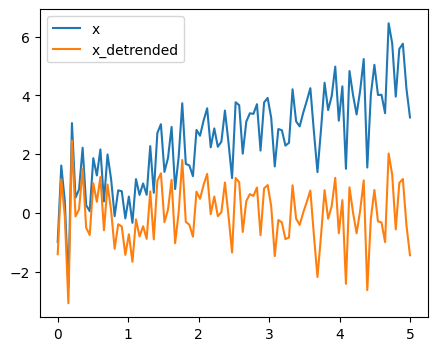

In [87]:
# Plot
plt.figure(figsize=(5, 4))
plt.plot(t, x, label="x")
plt.plot(t, x_detrended, label="x_detrended")
plt.legend(loc="best");

**Filtering**:

For non-linear filtering, {mod}`scipy.signal` has filtering (median
filter {func}`scipy.signal.medfilt`, Wiener {func}`scipy.signal.wiener`),
but we will discuss this in the image section.

::: {note}
:class: dropdown

{mod}`scipy.signal` also has a full-blown set of tools for the design
of linear filter (finite and infinite response filters), but this is
out of the scope of this tutorial.
:::

**Spectral analysis**:

{func}`scipy.signal.spectrogram` computes a spectrogram — frequency spectra
over consecutive time windows — while {func}`scipy.signal.welch` computes
a power spectrum density (PSD).

::: {list-table}
:header-rows: 1

- - Signal
  - Spectrogram
  - Power Spectral Density
- - ::: {glue} chirp_fig
    :doc: scipy_examples.md
    :::
  - ::: {glue} spectrogram_fig
    :doc: scipy_examples.md
    :::
  - ::: {glue} psd_fig
    :doc: scipy_examples.md
    :::

:::

See the [Spectrogram example](scipy-spectrogram-example).

## Image manipulation: {mod}`scipy.ndimage`

See [Scipy image processing](scipy-image-processing)

## Summary exercises on scientific computing

The summary exercises use mainly NumPy, SciPy and Matplotlib. They provide some
real-life examples of scientific computing with Python. Now that the basics of
working with NumPy and SciPy have been introduced, the interested user is
invited to try these exercises.

- [Statistical interpolotion](summary-exercise-stat-interp)
- [Non-linear fitting](summary-exercise-optimize)
- [Image processing](summary-exercise-image-processing)

:::{admonition} See also

**References to go further**

- Some chapters of the [advanced](advanced-topics-part) and the
  [packages and applications](applications-part) parts of the SciPy
  lectures.
- The [SciPy cookbook](https://scipy-cookbook.readthedocs.io)

:::

## Other useful links

- [fipy](https://www.ctcms.nist.gov/fipy)
- [odepack fortran library](https://people.sc.fsu.edu/~jburkardt/f77_src/odepack/odepack.html)
- [sfepy](https://sfepy.org/doc)